In [1]:
import pandas as pd
import numpy as np 
%matplotlib inline

In [3]:
df=pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [4]:
df=df.dropna()

In [5]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
df.index.freq='MS'

In [7]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [9]:
span=12
alpha=2/(span+1)

In [11]:
df['EWMA']=df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()

In [12]:
df.head()

,Thousands of Passengers,EWMA
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [13]:
model=SimpleExpSmoothing(df['Thousands of Passengers'])

In [15]:
fitted_model=model.fit(smoothing_level=alpha,optimized=False)

In [20]:
df['SES12']=fitted_model.fittedvalues.shift(-1)

In [21]:
df.head()

,Thousands of Passengers,EWMA,EWMA12,SES12
Month,,,,
1949-01-01,112,112.000000,112.000000,112.000000
1949-02-01,118,112.923077,112.923077,112.923077
1949-03-01,132,115.857988,115.857988,115.857988
1949-04-01,129,117.879836,117.879836,117.879836
1949-05-01,121,118.359861,118.359861,118.359861


In [22]:
df.drop('EWMA12',axis=1,inplace=True)

In [23]:
df.head()

,Thousands of Passengers,EWMA,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing #double exponential smooothing

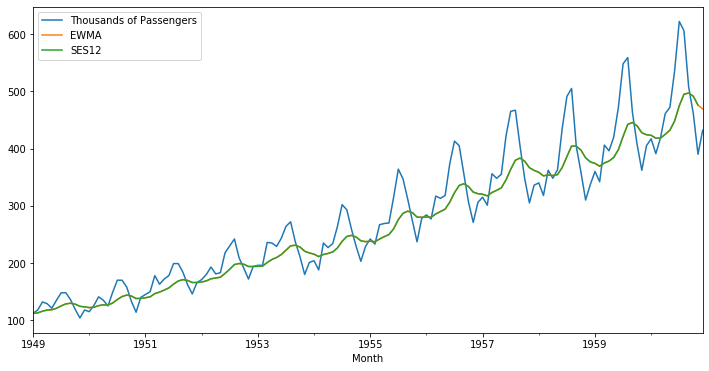

In [26]:
df.plot(figsize=(12,6))

In [32]:
df['DES_mul_12']=ExponentialSmoothing(df['Thousands of Passengers'],trend='mul').fit().fittedvalues.shift(-1)


C:\Users\Jasar Althaf\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [33]:
df.head()

,Thousands of Passengers,EWMA,SES12,DES_add_12,DES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.237773,112.049247
1949-02-01,118,112.923077,112.923077,120.237773,118.051885
1949-03-01,132,115.857988,115.857988,134.237773,132.058041
1949-04-01,129,117.879836,117.879836,131.237773,129.056722
1949-05-01,121,118.359861,118.359861,123.237773,121.053204


In [29]:
df.columns

Index(['Thousands of Passengers', 'EWMA', 'SES12', 'DES_add_12'], dtype='object')

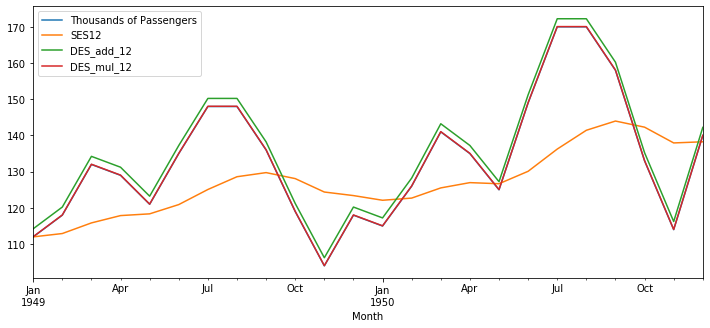

In [35]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12','DES_mul_12']].iloc[:24].plot(figsize=(12,5)) #first 2 years

In [36]:
#triple exponential smoothing

In [37]:
df['TES_mul_12']=ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

C:\Users\Jasar Althaf\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Jasar Althaf\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [39]:
df.columns

Index(['Thousands of Passengers', 'EWMA', 'SES12', 'DES_add_12', 'DES_mul_12',
       'TES_mul_12'],
      dtype='object')

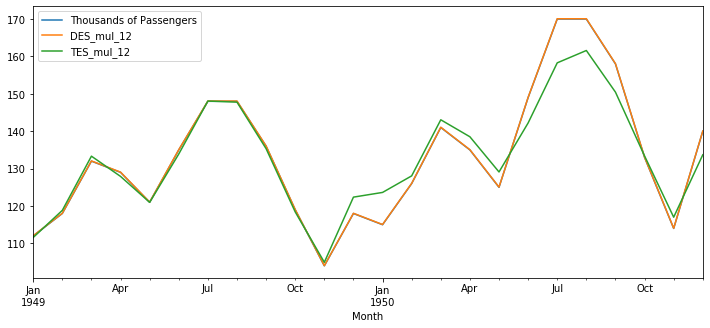

In [41]:
df[['Thousands of Passengers','DES_mul_12',
       'TES_mul_12']].iloc[:24].plot(figsize=(12,5))